# Install necessary libraries if they are not already available


In [1]:
!pip install scikit-learn
!pip install xgboost
!pip install joblib

print("Installation commands executed. Please check the output for confirmation.")

Installation commands executed. Please check the output for confirmation.


In [21]:
# Core Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Pre-processing and Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score




# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier  # Now included, assuming installation was successful

# Model Evaluation Metrics
from sklearn.metrics import (
    roc_auc_score,
    f1_score,
    precision_score,
    recall_score,
    accuracy_score,
    recall_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    auc,
    roc_curve

)

# Model Persistence (Deployment Preparation)
import joblib

print("All required libraries have been imported successfully.")

All required libraries have been imported successfully.


import dataset


In [4]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Check the uploaded files
import pandas as pd
df = pd.read_csv(next(iter(uploaded)))



Saving crop_growth.csv to crop_growth.csv


In [5]:
#print head
df.head()


,ID,Crop type,PH Value,Potassium (ppm),Phosphorus (ppm),Soil Type,Sunlight Hours,Temperature (°C),Humidity (%),Growth Status (Output)
0,82,Tomato,6.619158,313.502568,92.986545,Well-drained,10.923523,25.445704,74.140371,1
1,207,Capsicum,6.058814,331.392744,27.092285,Well-drained,10.035825,28.353554,76.599557,0
2,289,Capsicum,6.154097,119.974631,72.941826,Loamy Soil,8.269282,25.594354,83.039549,0
3,125,Cabbage,6.353503,321.636247,101.903690,Well-drained,7.346022,21.260301,76.365724,1
4,257,Capsicum,4.989351,292.567148,63.790303,Loamy Soil,11.550902,27.170621,71.218917,0


In [6]:
#print info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      300 non-null    int64  
 1   Crop type               300 non-null    object 
 2   PH Value                300 non-null    float64
 3   Potassium (ppm)         300 non-null    float64
 4   Phosphorus (ppm)        300 non-null    float64
 5   Soil Type               300 non-null    object 
 6   Sunlight Hours          300 non-null    float64
 7   Temperature (°C)        300 non-null    float64
 8   Humidity (%)            300 non-null    float64
 9   Growth Status (Output)  300 non-null    int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 23.6+ KB


In [7]:
#check null values
df.isnull().sum()

,0
ID,0
Crop type,0
PH Value,0
Potassium (ppm),0
Phosphorus (ppm),0
Soil Type,0
Sunlight Hours,0
Temperature (°C),0
Humidity (%),0
Growth Status (Output),0


In [8]:
#drop id column
df = df.drop('ID',axis=1)

In [9]:
df.head()

,Crop type,PH Value,Potassium (ppm),Phosphorus (ppm),Soil Type,Sunlight Hours,Temperature (°C),Humidity (%),Growth Status (Output)
0,Tomato,6.619158,313.502568,92.986545,Well-drained,10.923523,25.445704,74.140371,1
1,Capsicum,6.058814,331.392744,27.092285,Well-drained,10.035825,28.353554,76.599557,0
2,Capsicum,6.154097,119.974631,72.941826,Loamy Soil,8.269282,25.594354,83.039549,0
3,Cabbage,6.353503,321.636247,101.903690,Well-drained,7.346022,21.260301,76.365724,1
4,Capsicum,4.989351,292.567148,63.790303,Loamy Soil,11.550902,27.170621,71.218917,0


In [11]:
#define feature and target
X = df.drop('Growth Status (Output)',axis =1)
y = df['Growth Status (Output)']


In [12]:
# List of categorical columns for One-Hot Encoding
categorical_cols = ['Crop type', 'Soil Type']

# List of numerical columns for Standard Scaling
numerical_cols = ['PH Value', 'Potassium (ppm)', 'Phosphorus (ppm)', 'Sunlight Hours', 'Temperature (°C)', 'Humidity (%)']

# Create a column transformer to apply OneHotEncoder for categorical columns and StandardScaler for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply preprocessing pipeline
X_processed = preprocessor.fit_transform(X)

# Verify the transformed data
X_processed

array([[ 0.4312418 ,  0.52235669,  0.76397994, ...,  0.        ,
         0.        ,  1.        ],
       [-0.75941192,  0.74009897, -1.65692982, ...,  0.        ,
         0.        ,  1.        ],
       [-0.55694741, -1.83308203,  0.02755076, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.9396507 ,  0.1080593 ,  1.12421556, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.45441122, -1.18994195, -0.73196375, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.3248828 ,  0.2477324 , -0.74847751, ...,  0.        ,
         0.        ,  0.        ]])

In [13]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

#print shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (240, 17)
X_test shape: (60, 17)


In [14]:
#initiate models
logreg = LogisticRegression(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
dt = DecisionTreeClassifier(random_state = 42)
xgb = XGBClassifier(random_state = 42)

In [15]:
#train the models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [16]:
#predict on the test
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

Logistic Regression Evaluation:
Accuracy: 0.7333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        42
           1       0.57      0.44      0.50        18

    accuracy                           0.73        60
   macro avg       0.68      0.65      0.66        60
weighted avg       0.72      0.73      0.72        60

Confusion Matrix:
 [[36  6]
 [10  8]]
AUC (Area Under Curve): 0.7962962962962963
Cross-validation scores: [0.66666667 0.79166667 0.75       0.75       0.83333333]
Mean cross-validation score: 0.7583333333333333


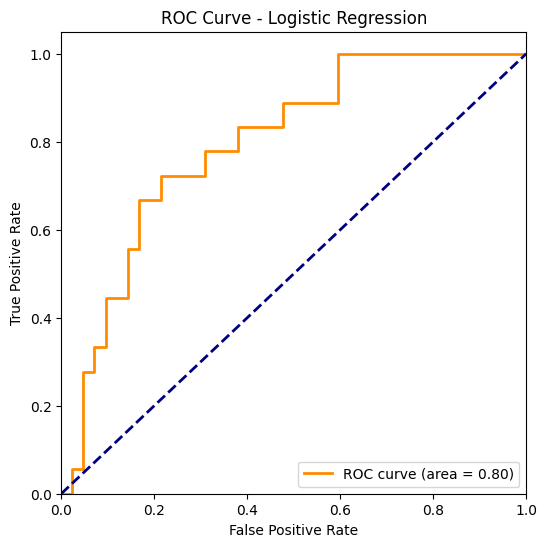

Random Forest Evaluation:
Accuracy: 0.8166666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.71      0.67      0.69        18

    accuracy                           0.82        60
   macro avg       0.78      0.77      0.78        60
weighted avg       0.81      0.82      0.82        60

Confusion Matrix:
 [[37  5]
 [ 6 12]]
AUC (Area Under Curve): 0.8849206349206349
Cross-validation scores: [0.72916667 0.875      0.85416667 0.75       0.9375    ]
Mean cross-validation score: 0.8291666666666666


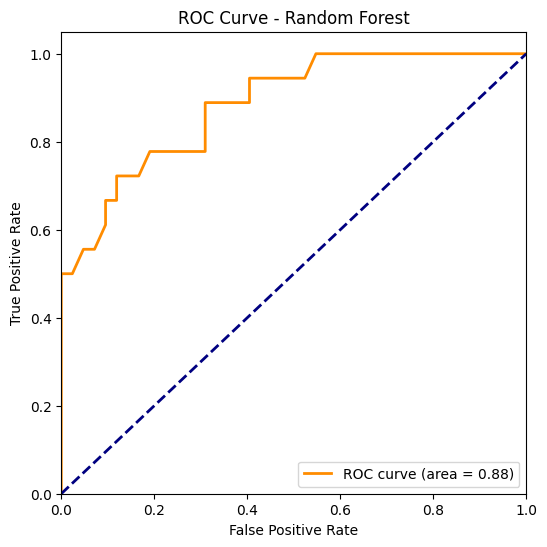

Decision Tree Evaluation:
Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.67      0.76        42
           1       0.50      0.78      0.61        18

    accuracy                           0.70        60
   macro avg       0.69      0.72      0.68        60
weighted avg       0.76      0.70      0.71        60

Confusion Matrix:
 [[28 14]
 [ 4 14]]
AUC (Area Under Curve): 0.7222222222222223
Cross-validation scores: [0.75       0.8125     0.79166667 0.77083333 0.875     ]
Mean cross-validation score: 0.8


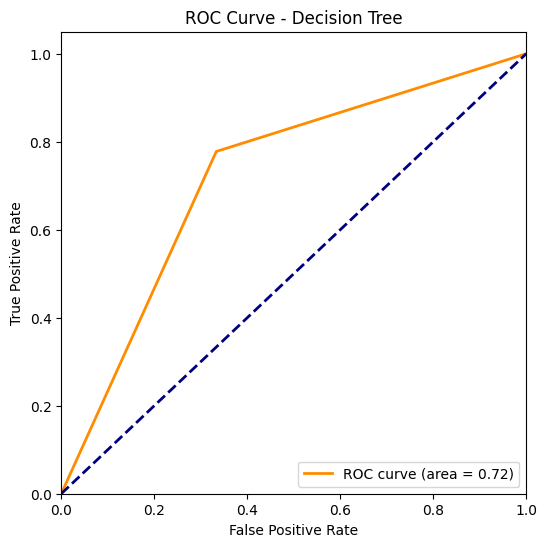

XGBoost Evaluation:
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        42
           1       0.74      0.78      0.76        18

    accuracy                           0.85        60
   macro avg       0.82      0.83      0.82        60
weighted avg       0.85      0.85      0.85        60

Confusion Matrix:
 [[37  5]
 [ 4 14]]
AUC (Area Under Curve): 0.8835978835978835
Cross-validation scores: [0.83333333 0.8125     0.85416667 0.85416667 0.95833333]
Mean cross-validation score: 0.8625


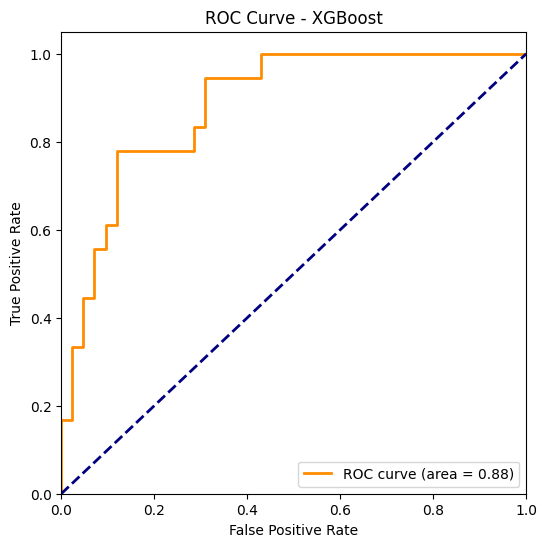

In [25]:
#define the function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Classification Report
    class_report = classification_report(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

    #display results
    print(f"{model_name} Evaluation:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", class_report)
    print("Confusion Matrix:\n", cm)
    print("AUC (Area Under Curve):", roc_auc)
    print("Cross-validation scores:", cv_scores)
    print("Mean cross-validation score:", cv_scores.mean())

    # Plot ROC Curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Evaluate all models using the new function
evaluate_model(logreg, X_train, X_test, y_train, y_test, 'Logistic Regression')
evaluate_model(rf, X_train, X_test, y_train, y_test, 'Random Forest')
evaluate_model(dt, X_train, X_test, y_train, y_test, 'Decision Tree')
evaluate_model(xgb, X_train, X_test, y_train, y_test, 'XGBoost')


In [26]:
model_filename = 'best_growth_model.joblib'
joblib.dump(xgb, model_filename)
print(f"Model saved to: {model_filename}")

preprocessor_filename = 'preprocessor.joblib'
joblib.dump(preprocessor, preprocessor_filename)
print(f"Preprocessor saved to: {preprocessor_filename}")

feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names.joblib')
print(f"Feature names saved to: feature_names.joblib")

Model saved to: best_growth_model.joblib
Preprocessor saved to: preprocessor.joblib
Feature names saved to: feature_names.joblib


In [27]:

def predict_growth_status(input_data):
    """
    Predicts the growth status for a single plant's data.

    :param input_data: A dictionary where keys are feature names
                       (e.g., 'Crop type', 'PH Value') and
                       values are the corresponding raw data.
    :return: A string prediction ('Good Growth' or 'Poor Growth')
             or an error message.
    """
    try:
        # Load the saved components
        model = joblib.load('best_growth_model.joblib')
        preprocessor = joblib.load('preprocessor.joblib')
        feature_names = joblib.load('feature_names.joblib')

        # Convert the input dictionary to a pandas DataFrame
        input_df = pd.DataFrame([input_data], columns=feature_names)

        # Apply the loaded preprocessor
        input_processed = preprocessor.transform(input_df)

        # Make the prediction
        prediction = model.predict(input_processed)

        # Return a human-readable result
        if prediction[0] == 1:
            return "Good Growth (Predicted: 1)"
        else:
            return "Poor Growth (Predicted: 0)"

    except FileNotFoundError:
        return "Error: Model/preprocessor files not found. Please run Cell 6 first."
    except Exception as e:
        return f"An error occurred during prediction: {e}"

print("Inference function 'predict_growth_status' is defined.")


Inference function 'predict_growth_status' is defined.


In [32]:
# Sample input data (should match the feature names)
input_data = {
    'PH Value': 6.05881360075316,
    'Potassium (ppm)': 331.392744274257,
    'Phosphorus (ppm)': 27.0922854742663,
    'Sunlight Hours': 10.0358245073631,
    'Temperature (°C)': 28.353553877528,
    'Humidity (%)': 76.5995572446511,
    'Crop type': 'Capsicum',
    'Soil Type': 'Well-drained'
}

# Make a prediction
result = predict_growth_status(input_data)
print(result)


Poor Growth (Predicted: 0)
